<a href="https://colab.research.google.com/github/jordantangy/MoviePosterClassification-CNN/blob/main/ConvNet%20Movie%20Poster%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 48kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 501kB 61.1MB/s 
     |████████████████████████████████| 4.3MB 58.2MB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
#import data set
!git clone https://github.com/jordantangy/Movie-Posters-Dataset.git

Cloning into 'Movie-Posters-Dataset'...
remote: Enumerating objects: 42003, done.
remote: Counting objects: 100% (42003/42003), done.
remote: Compressing objects: 100% (42000/42000), done.
remote: Total 66546 (delta 1), reused 42002 (delta 0), pack-reused 24543
Receiving objects: 100% (66546/66546), 572.63 MiB | 60.76 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (7872/7872), done.


In [5]:
data = pd.read_csv('/content/Movie-Posters-Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


100%|██████████| 7254/7254 [00:37<00:00, 192.02it/s]


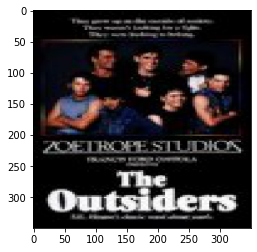

In [8]:
pic_width = 350
pic_height = 350
X = []
for i in tqdm(range(int(data.shape[0]))):
  path = '/content/Movie-Posters-Dataset/Images/'+ data['Id'][i] +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)
plt.imshow(X[24])

In [9]:
#matrix y comes from the csv file, we just drop the column id and genre.
#So we have a matrix representing which genre each movie belongs to

y = data.drop(['Id','Genre'], axis = 1)
y = y.to_numpy()

#split training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)


## Building CNN 

In [21]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(25, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 86, 86, 32)       

### **Training the ConvNet**

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 210s 34ms/sample - loss: 0.5009 - accuracy: 0.7737 - val_loss: 1.9971 - val_accuracy: 0.7274
Epoch 2/5
6165/6165 [==============================] - 210s 34ms/sample - loss: 0.2435 - accuracy: 0.9117 - val_loss: 0.6480 - val_accuracy: 0.8828
Epoch 3/5
6165/6165 [==============================] - 221s 36ms/sample - loss: 0.2342 - accuracy: 0.9135 - val_loss: 0.3977 - val_accuracy: 0.8940
Epoch 4/5
6165/6165 [==============================] - 200s 32ms/sample - loss: 0.2277 - accuracy: 0.9153 - val_loss: 0.3597 - val_accuracy: 0.9010
Epoch 5/5
6165/6165 [==============================] - 201s 33ms/sample - loss: 0.2222 - accuracy: 0.9167 - val_loss: 0.3178 - val_accuracy: 0.9080


the accuracy of the model is: 0.91673654
the loss obtained is : 0.22218602822258138


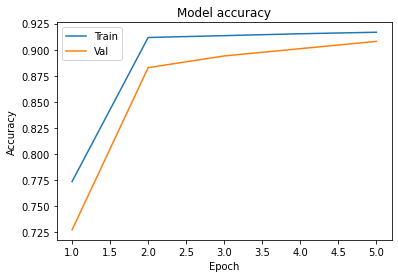

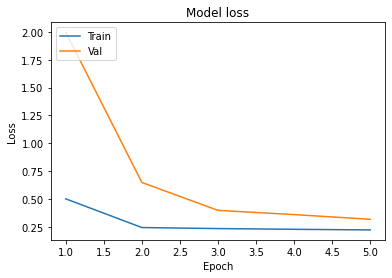

In [46]:
accuracy = history.history['accuracy']
loss = history.history['loss']
print('the accuracy of the model is: ' + str(accuracy[4]))
print('the loss obtained is : ' + str(loss[4]))
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)


The 3 genres predicted for the Movie Fauda are :
Action
Thriller
Drama


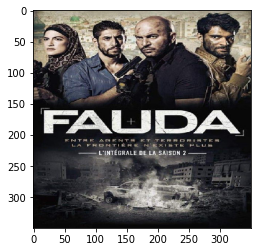

In [71]:
img = image.load_img('/content/Movie-Posters-Dataset/Fauda.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[2:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])

print('The 3 genres predicted for the Movie Fauda are :')
for i in range(22,25):
  print(genres[top3][i])

The 3 genres predicted for the Movie Interstellar are :
Action
Comedy
Adventure


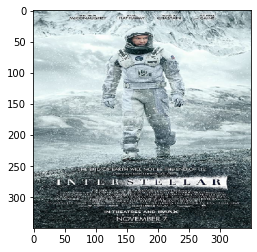

In [75]:
img = image.load_img('/content/716P1xCmnPL._AC_SY879_.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[2:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])

print('The 3 genres predicted for the Movie Interstellar are :')
for i in range(22,25):
  print(genres[top3][i])